<a href="https://colab.research.google.com/github/mattdo40/Colab/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.metrics import make_scorer, accuracy_score
from google.colab import drive 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [143]:
train = pd.read_csv('gdrive/My Drive/traintitanic.csv')
test = pd.read_csv('gdrive/My Drive/testtitanic.csv')

In [144]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


**Data Dictionary**
*   Survived: 0 = No, 1 = Yes
*   pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
*   sibsp: # of siblings / spouses aboard the Titanic
*   parch: # of parents / children aboard the Titanic
*   ticket: Ticket number
*   cabin: Cabin number
*   embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton


In [145]:
train.shape

(891, 12)

In [146]:
train.drop('Name', axis=1, inplace=True)
train.head()
test.drop('Name', axis=1, inplace=True)
test.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [147]:
"Delete the Column name Cabin,Ticket,Embarked because it has little information as of the values ar NaN"
train.drop("Cabin", axis=1, inplace=True)
test.drop("Cabin", axis=1, inplace=True)
train.drop("Ticket", axis=1, inplace=True)
test.drop("Ticket", axis=1, inplace=True)
train.drop("Embarked", axis=1, inplace=True)
test.drop("Embarked", axis=1, inplace=True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [148]:


# set the target series

y = train["Survived"]

# set the feature dataframe

features = ["Pclass", "Sex", "SibSp", "Parch", "Fare", "Age"]
X = pd.get_dummies(train[features])
X_unknown = pd.get_dummies(test[features])

# impute values as there is missing data in the fares column

from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
X = my_imputer.fit_transform(X)
X_unknown = my_imputer.fit_transform(X_unknown)

# split the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [149]:



clf = MLPClassifier(hidden_layer_sizes = (50,),max_iter=50000, activation='logistic', solver='lbfgs', random_state=1).fit(X_train, y_train)
    
# find the model accuracy
    
model_accuracy = clf.score(X_test, y_test)
    
print(model_accuracy)
    


0.8135593220338984


In [150]:
ids = test['PassengerId']
predictions = clf.predict(X_unknown)
output = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions })
output.to_csv('titanic-predictions.csv', index = False)
output.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


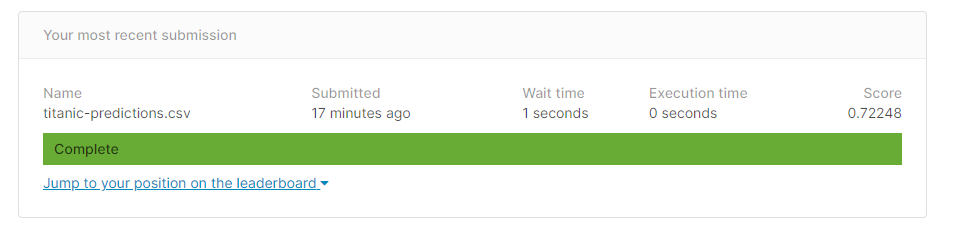